In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def make_variables(x, y, initializer):
    return tf.Variable(initializer(shape=[x, y], dtype=tf.float16))

In [3]:
def hardlim(var: tf.Variable):
    res = np.zeros(var.numpy().shape)
    for i, row in enumerate(var.numpy()):
        for j, col in enumerate(row):
            res[i][j] = 1 if col > 0 else 0
    return tf.Variable(res, dtype=tf.float16, shape=(var.numpy().shape))

In [4]:
num_patterns = 4
num_inputs = 2
num_neurons = 4
P = tf.constant([[0, 0, 1, 1],
                 [0, 1, 0, 1]], dtype=tf.float16)
T = tf.constant([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]], dtype=tf.float16)
init = tf.random_uniform_initializer(minval=-1., maxval=1.)
W = make_variables(num_neurons, num_inputs, init)
b = make_variables(num_neurons, 1, init)
dw = tf.zeros([num_neurons, 2], dtype=tf.float16)
e = tf.zeros([num_neurons, num_patterns], dtype=tf.float16)
sum_e = tf.zeros([num_neurons, 1], dtype=tf.float16)

In [6]:
for _ in range(10):
    output = tf.subtract(tf.matmul(W, P), b)
    a = hardlim(output)
    e = tf.subtract(T, a)
    dw = tf.matmul(e, tf.transpose(P))
    sum_e = tf.reduce_sum(e, 1, keepdims=True)
    W = tf.add(W, dw)
    b = tf.subtract(b, sum_e)
    print(sum(sum_e.numpy()))

[-9.]
[4.]
[1.]
[1.]
[2.]
[-2.]
[1.]
[-2.]
[1.]
[0.]


In [14]:
output = tf.subtract(tf.matmul(W, P), b)
output

<tf.Tensor: shape=(4, 4), dtype=float16, numpy=
array([[ 0.3047 , -0.998  , -0.7344 , -2.037  ],
       [-0.04883,  1.662  , -2.436  , -0.7246 ],
       [-0.8438 , -2.549  ,  0.04102, -1.664  ],
       [-2.037  , -0.949  , -0.3555 ,  0.7324 ]], dtype=float16)>

In [15]:
a = hardlim(output)
a

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float16, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float16)>

In [16]:
e = tf.subtract(T, a)
e

<tf.Tensor: shape=(4, 4), dtype=float16, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float16)>

In [7]:
p = P.numpy()
w = W.numpy()
u = b.numpy()

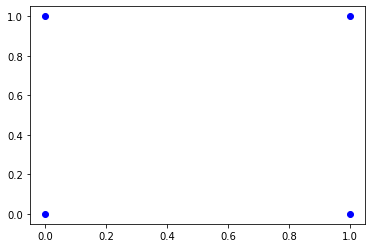

In [8]:
for row in p.T:
    x = row[0]
    y = row[1]
    plt.plot(x, y, "bo")

In [9]:
nx, ny = (5, 5)
xv = np.linspace(0, 1, nx)
yv = np.linspace(0, 1, ny)
x, y = np.meshgrid(xv, yv)

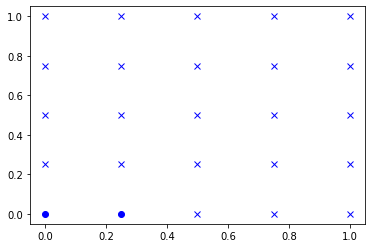

In [10]:
point = 0
color = ["b", "g", "r", "k"]
mesh1 = np.zeros((5, 5), dtype=np.float)

for i, row in enumerate(mesh1):
    for j, _ in enumerate(row):
        pos_v = np.array([xv[i], yv[j]])
        res = np.dot(pos_v, w[point])-u[point]
        mesh1[i][j] = 1 if res > 0 else 0
for i, row in enumerate(mesh1):
    for j, _ in enumerate(row):
        if mesh1[i][j]>0:
            plt.plot(xv[i], yv[j], color[point]+"o")
        else:
            plt.plot(xv[i], yv[j], color[point]+"x")

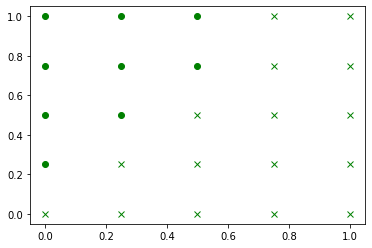

In [11]:
point = 1
color = ["b", "g", "r", "k"]
mesh1 = np.zeros((5, 5), dtype=np.float)

for i, row in enumerate(mesh1):
    for j, _ in enumerate(row):
        pos_v = np.array([xv[i], yv[j]])
        res = np.dot(pos_v, w[point])-u[point]
        mesh1[i][j] = 1 if res > 0 else 0
for i, row in enumerate(mesh1):
    for j, _ in enumerate(row):
        if mesh1[i][j]>0:
            plt.plot(xv[i], yv[j], color[point]+"o")
        else:
            plt.plot(xv[i], yv[j], color[point]+"x")

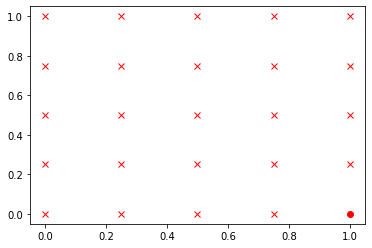

In [12]:
point = 2
color = ["b", "g", "r", "k"]
mesh1 = np.zeros((5, 5), dtype=np.float)

for i, row in enumerate(mesh1):
    for j, _ in enumerate(row):
        pos_v = np.array([xv[i], yv[j]])
        res = np.dot(pos_v, w[point])-u[point]
        mesh1[i][j] = 1 if res > 0 else 0
for i, row in enumerate(mesh1):
    for j, _ in enumerate(row):
        if mesh1[i][j]>0:
            plt.plot(xv[i], yv[j], color[point]+"o")
        else:
            plt.plot(xv[i], yv[j], color[point]+"x")

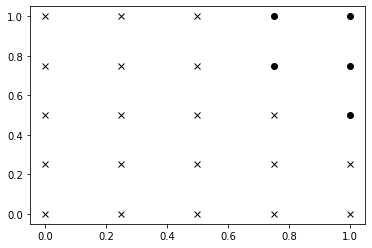

In [13]:
point = 3
color = ["b", "g", "r", "k"]
mesh1 = np.zeros((5, 5), dtype=np.float)

for i, row in enumerate(mesh1):
    for j, _ in enumerate(row):
        pos_v = np.array([xv[i], yv[j]])
        res = np.dot(pos_v, w[point])-u[point]
        mesh1[i][j] = 1 if res > 0 else 0
for i, row in enumerate(mesh1):
    for j, _ in enumerate(row):
        if mesh1[i][j]>0:
            plt.plot(xv[i], yv[j], color[point]+"o")
        else:
            plt.plot(xv[i], yv[j], color[point]+"x")